## Chapter 12: Advection equations

And friends...



### 12.1 Traffic Flow

In [7]:
using FundamentalsNumericalComputation

* $q$ is the flux:  cars per unit time 
* $\rho$ is the density:  cars per unit length


These are both functions of position and time.   The text proposes a model for the flux as a function of the density:

$$
Q_0(\rho) = \frac{4 q_m \rho_m \rho (\rho-\rho_c) (\rho_m-\rho_c)}{[\rho (\rho_c-2 \rho_m)+\rho_c \rho_m]^2}.
$$

They further propose a term that accounts for driver anticipation when the density is changing:

$$
q = Q_0(\rho) + \epsilon \rho_x
$$

The fundamental equation is the conservation of cars:

$$
\rho_t + q_x = 0
$$

This says that in some small interval of the road, the number of cars in that interval is changing only because of the flow of cars in and out of the interval ($\rho_t \Delta x = q_x*\Delta x = (q(x+\Delta x) - q(x))$).  

### Advection equation

A simpler model to consider is the advection equation:

$$
u_t + c u_x = 0
$$

* A *hyperbolic* equation that is a model for the transport of a quantity $u(x,t)$ at a constant speed $c$. 
* Analytic solution is a wave that moves at speed $c$:  $u(x,t) = u(x-ct,0)$. (As can be seen by simple substitution.) 

#### Numerical solution

We can use the method of lines from chapter 11, using a second order difference matrix that for periodic boundary conditions:

$$
\mathbf{D}_x =
 \frac{1}{2h}
    \begin{bmatrix}
      0 & 1 & & & -1 \\
      -1 & 0 & 1 & & \\
      & \ddots & \ddots & \ddots & \\
      & & -1 & 0 & 1 \\
      1 & & & -1 & 0
    \end{bmatrix}.
$$

In [8]:
x,Dₓ,Dₓₓ = FNC.diffper(300,[-4,4]);
f = (u,c,t) -> -c*(Dₓ*u);

# a bump function
u_init = @. 1 + exp(-3*x^2)
IVP = ODEProblem(f,u_init,(0.,4.),2)
sol = solve(IVP,RK4());

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


In [9]:
anim = @animate for t in range(0,4,length=120) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([1,2],L"u(x,t)"),dpi=100,    
        title=@sprintf("Advection equation, t=%.2f",t))
end
mp4(anim,"advection.mp4")

┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\advection.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\advection.mp4")

#### Back to traffic flow

In [10]:
ρc = 1080;  ρm = 380;  q_m = 10000;
dQ0 = ρ -> 4q_m*ρc^2*(ρc-ρm)*ρm*(ρm-ρ)/(ρ*(ρc-2*ρm) + ρc*ρm)^3;

Note the use of the stiff solver due to the presence of the $\rho_x$ term.  (diffusion)

In [11]:
x,Dₓ,Dₓₓ = FNC.diffper(800,[0,4]);
ode = (ρ,ϵ,t) -> -dQ0.(ρ).*(Dₓ*ρ) + ϵ*(Dₓₓ*ρ);

ρ_init = @. 400 + 10*exp(-20*(x-3)^2)
IVP = ODEProblem(ode,ρ_init,(0.,1.),0.02)
sol = solve(IVP,Rodas4P());


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


In [12]:
anim = @animate for t in range(0,0.9,length=91) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([400,410],"density"),dpi=100,    
        title=@sprintf("Traffic flow, t=%.2f",t) )
end
mp4(anim,"traffic-fade.mp4")

┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\traffic-fade.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\traffic-fade.mp4")

Larger bump - 

In [13]:
ρ_init = @. 400 + 80*exp(-16*(x-3)^2)
IVP = ODEProblem(ode,ρ_init,(0.,0.5),0.02)
sol = solve(IVP,Rodas4P());
anim = @animate for t in range(0,0.5,length=101) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([400,480],"density"),dpi=100,    
        title=@sprintf("Traffic jam, t=%.2f",t) )
end
mp4(anim,"traffic-jam.mp4")

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\traffic-jam.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\traffic-jam.mp4")

Kinda cool!  How fast is this bump moving?

#### Exercise 12.2.2 
**(a)** Using as large a discretization and as small a dissipation parameter $\epsilon$  as you can get away with, perform experiments to estimate the speed of the shockwave in  between times $t=0.11$ and $t=0.15$. (Hint: You can use `argmax` to locate the peak of the solution vector at a particular time.)

**(b)** Theory predicts that the speed of the shockwave is the average of $Q_0'$ evaluated at the values of $\rho$ at the top and bottom of the shock. Perform this calculation and compare to the result of part (a).

In [91]:
grid_points = 600;
x,Dₓ,Dₓₓ = FNC.diffper(grid_points,[1,4]);
ode = (ρ,ϵ,t) -> -dQ0.(ρ).*(Dₓ*ρ) + ϵ*(Dₓₓ*ρ);

In [105]:
ρ_init = @. 400 + 80*exp(-16*(x-3)^2)
IVP = ODEProblem(ode,ρ_init,(0.,0.15),0.01)
sol = solve(IVP,Rodas4P());

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


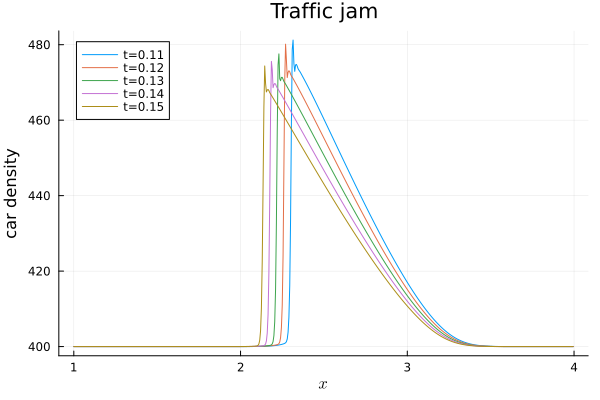

In [106]:
plt = plot(legend=:topleft,title="Traffic jam",
    xaxis=(L"x"),yaxis=("car density"))
x_max=Vector{Float64}();
v_theory = Vector{Float64}();
ts = Array((11:15)/100)
for t in ts
    push!(v_theory, (dQ0.(sol(t))[argmax(sol(t))] + dQ0(400)/2))
    push!(x_max, x[argmax(sol(t))])
    plot!(x,sol(t),label=@sprintf("t=%.2f",t))
end
plt

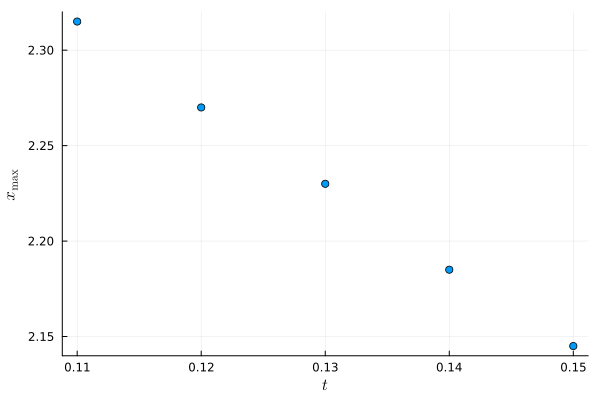

In [107]:
scatter(ts,x_max,legend=false,xaxis=(L"t"),yaxis=(L"x_{\max}"))

In [108]:
V = [ts.^0 ts] 
c  = V\x_max
c[2]

-4.249999999999974

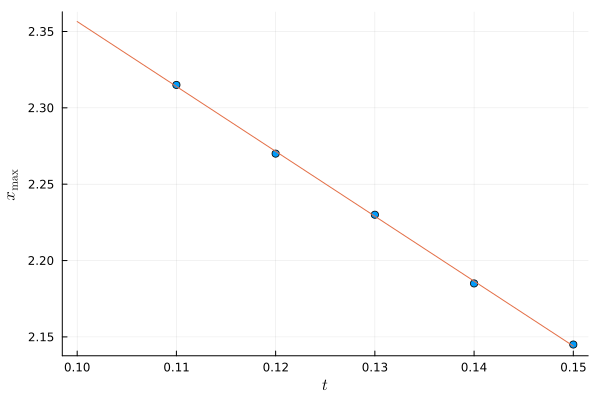

In [109]:
p = Polynomial(c)
plot!(p,0.1,0.15)

In [110]:
v_theory

5-element Vector{Float64}:
 -7.7831388224044975
 -7.720730342676038
 -7.572225432540901
 -7.45655319210833
 -7.3859474687229545

Maybe i don't understand what the 'bottom of the shock' is.